# Importing Libraries

In [76]:
import pandas as pd  # Import pandas as pd for data manipulation
import matplotlib.pyplot as plt  # Import pyplot as plt for visualizations
import seaborn as sns  # Import seaborn as sns for statistical plots
import os  # Import os to access local file directories
import matplotlib.ticker as ticker  # Import ticker as ticker to format plot axes
import plotly.express as px  # Import Plotly as px for interactive visualizations
import zipfile # Unzips the uploaded zip file
with zipfile.ZipFile("Spotify_songs.zip", 'r') as zip_ref: # What zip file that need to be unzipped
    zip_ref.extractall("Spotify_songs") # Extract all

# Combine the data sheets into one

In [77]:
data_folder = "Spotify_songs"  # Set the path to the folder with yearly Spotify CSV files
all_dataframes = []  # Make a list to collect each year's data

for filename in os.listdir(data_folder):  # Loop through file in the folder
    if filename.endswith(".csv") and filename[:-4].isdigit():  # Only use CSV files named by year
        file_path = os.path.join(data_folder, filename)  # Build path to current file
        year = int(filename.replace(".csv", ""))  # Extract year from filename
        df = pd.read_csv(file_path)  # Load the CSV into a DataFrame
        df["year"] = year  # Add a column indicating the year
        all_dataframes.append(df)  # Add the DataFrame to the list

combined_df = pd.concat(all_dataframes, ignore_index=True)  # Merge all yearly DataFrames into one
combined_csv_path = "Spotify_songs/combined_spotify_2010_2019.csv"  # Path to save merged dataset
combined_df.to_csv(combined_csv_path, index=False)  # Export the merged dataset to CSV
print(f"Combined data saved to: {combined_csv_path}")  # Confirm the save path

Combined data saved to: Spotify_songs/combined_spotify_2010_2019.csv


# Task 1: Plot the top 10 most popular songs of the user’s database 2010-2019 (with the most populars on top)

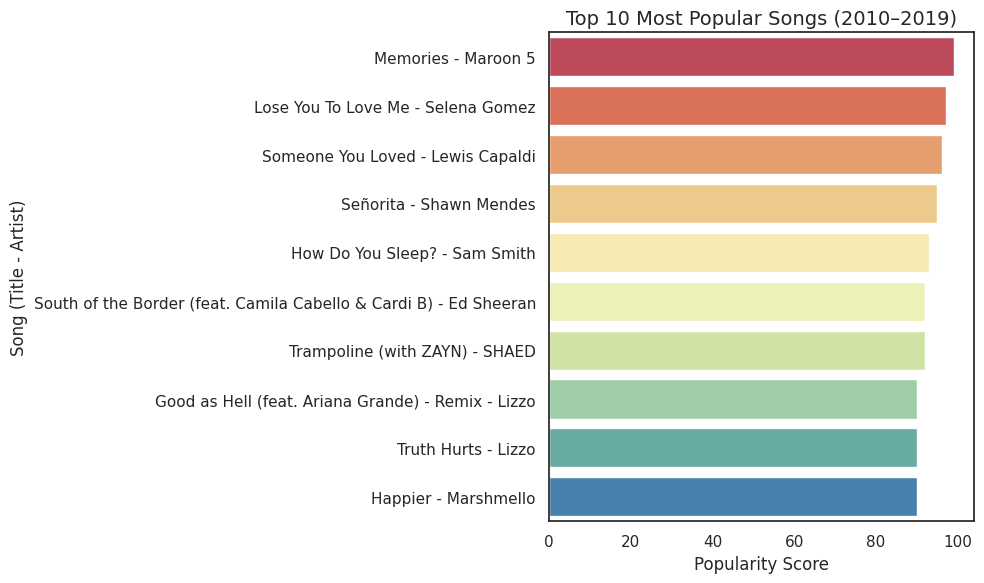

In [78]:
# Load the dataset
df = pd.read_csv("Spotify_songs/combined_spotify_2010_2019.csv")

# Set plot style
sns.set(style="white")

# Top 10 most popular songs
top_songs = df.sort_values(by="pop", ascending=False).head(10)
top_songs["title_artist"] = top_songs["title"] + " - " + top_songs["artist"]

# Plot and size
plt.figure(figsize=(10, 6))

# Assign hue to use the palette correctly (one color per bar)
sns.barplot(data=top_songs,
            y="title_artist", # y axis name
            x="pop", # x axis name
            hue="title_artist", # Using hue to support palette, without it, it calls for warning
            palette="Spectral", # Using the color palette Spectral
            dodge=False, # Ensures that the bars stay aligned and stacked
            legend=False) # removing legend to remove future warning

# Customize labels and layout
plt.title("Top 10 Most Popular Songs (2010–2019)", fontsize=14) # Title and fontsize
plt.xlabel("Popularity Score") # X axis label
plt.ylabel("Song (Title - Artist)") # Y axis label
plt.tight_layout() # Adjust spacing to prevent label overlap
plt.show() #Print

# Task 2: Plot the top 10 artists with most songs in the database

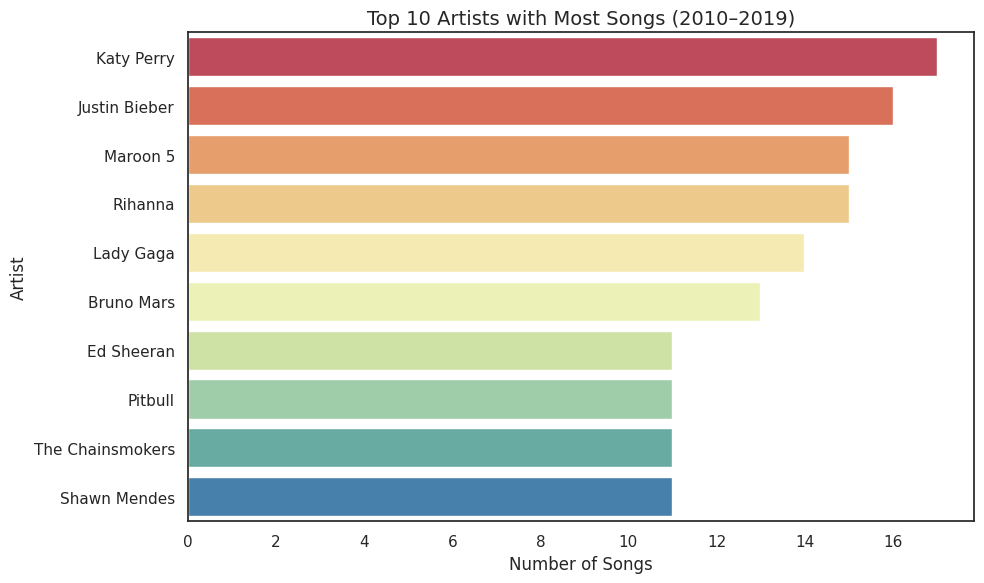

In [79]:
# Count songs per artist and take top 10
artist_counts = df['artist'].value_counts().head(10).reset_index()
artist_counts.columns = ['artist', 'song_count']

# plot and size
plt.figure(figsize=(10, 6))
sns.barplot(data=artist_counts,
            y='artist', # y axis name
            x='song_count', # x axis name
            hue='artist', # Using hue to support palette, without it, it calls for warning
            palette='Spectral', # Using the color palette Spectral
            dodge=False, # Ensures that the bars stay aligned and stacked
            legend=False) # removing legend to remove future warning

# Add title and labels
plt.title("Top 10 Artists with Most Songs (2010–2019)", fontsize=14) # Title and fontsize
plt.xlabel("Number of Songs") # X axis label
plt.ylabel("Artist") # Y axis label
plt.tight_layout() # Adjust spacing to prevent label overlap
plt.show() #Print

# Task 3: Plot the top 10 genres with most popular songs

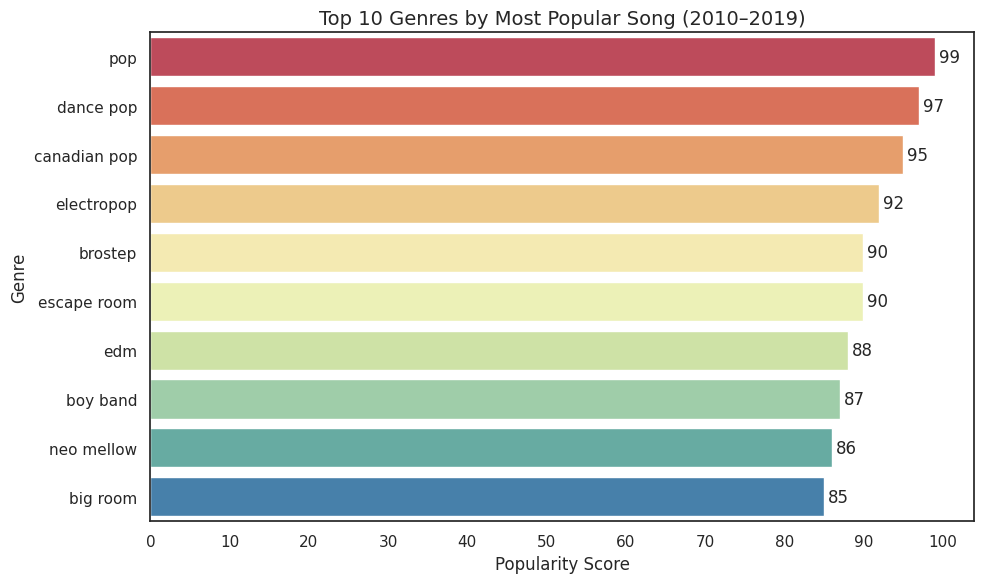

In [81]:
# Find the most popular song per genre
genre_popularity = df.groupby('top genre')['pop'].max().sort_values(ascending=False).head(10).reset_index()
genre_popularity.columns = ['genre', 'max_popularity']

# Set visual style, figure and size
sns.set(style="white")
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_popularity,
            y='genre', # y axis name
            x='max_popularity', # x axis name
            hue='genre', # Using hue to support palette, without it, it calls for warning
            palette='Spectral', # Using the color palette Spectral
            dodge=False, # Ensures that the bars stay aligned and stacked
            legend=False) # removing legend to remove future warning

# Add text labels with popularity values
for i, pop_score in enumerate(genre_popularity['max_popularity']):
    plt.text(pop_score + 0.5, i, f"{pop_score}", va='center')

# title and labels
plt.title("Top 10 Genres by Most Popular Song (2010–2019)", fontsize=14) # Title and fontsize
plt.xlabel("Popularity Score") # X axis label
plt.ylabel("Genre") # Y axis label
plt.xticks(ticks=range(0, 110, 10)) # sets the tick mark on a custom range
plt.tight_layout() # Adjust spacing to prevent label overlap
plt.show() #Print

# Task 4: Scatter plot the relationship between popularity and danceability

In [72]:
# Convert the 'year' column to string so it can be used as a color category
df["year"] = df["year"].astype(str)

# Define the correct order of years as strings (to sort the legend and colors)
year_order = [str(y) for y in range(2010, 2020)]

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(
    df,  # Use the full combined Spotify dataset
    x="pop",  # X-axis shows song popularity score
    y="dnce",  # Y-axis shows danceability score
    hover_data=["title", "artist", "year"],  # Show song info when hovering
    color="year",  # Use color different each year
    category_orders={"year": year_order},  # Ensure years appear in correct order in the legend
    labels={"pop": "Popularity", "dnce": "Danceability"},  # Customize axis labels
    title="Interactive Scatter Plot: Popularity vs Danceability (2010–2019)"  # Set chart title
)

fig.show()  # Print

# Task 5: Plot a joint plot that shows the relationship between bpm and nrgy

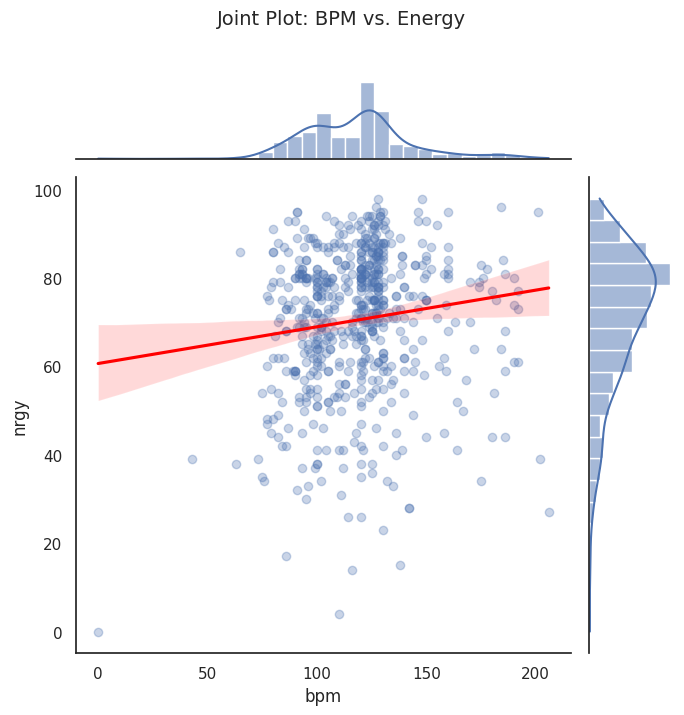

In [82]:
# Drop rows with missing bpm or nrgy
df_clean = df[['bpm', 'nrgy']].dropna()

# Create jointplot with scatter and regression line
sns.jointplot(
    data=df_clean,        # Use cleaned data
    x='bpm',              # X axis is bpm
    y='nrgy',             # Y axis is energy
    kind='reg',           # Add regression line
    height=7,             # Size of the plot
    scatter_kws={'alpha': 0.3},  # Make points seethrough
    line_kws={'color': 'red'}   # Make the line red
)

# Title and layout
plt.suptitle("Joint Plot: BPM vs. Energy", fontsize=14, y=1.02)  # Title and fontsize
plt.tight_layout()  # Adjust spacing to prevent label overlap
plt.show()  # Print

# Task 6: Plot the top 10 genres with the highest energy score

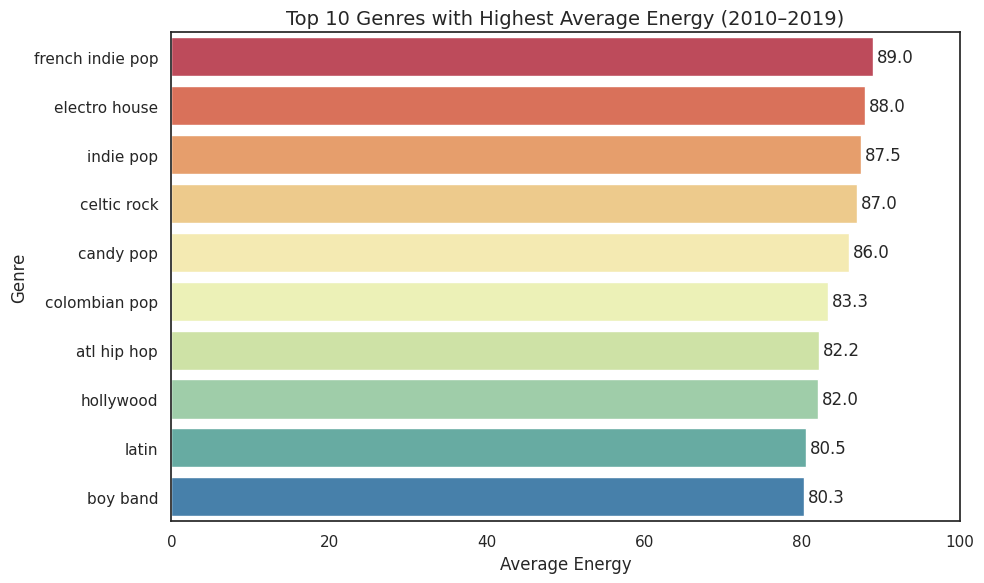

In [83]:
# Calculate average energy per genre and select top 10
genre_energy = df.groupby('top genre')['nrgy'].mean().sort_values(ascending=False).head(10).reset_index()
genre_energy.columns = ['genre', 'avg_energy']

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_energy,
            x='avg_energy', # x axis name
            y='genre', # y axis name
            hue='genre', # Using hue to support palette, without it, it calls for warning
            palette='Spectral', # Using the color palette Spectral
            dodge=False, # Ensures that the bars stay aligned and stacked
            legend=False) # removing legend to remove future warning

# Add energy value labels to the bars
for i, energy in enumerate(genre_energy['avg_energy']):
    plt.text(energy + 0.5, i, f"{energy:.1f}", va='center')

# Add title and axis labels
plt.title("Top 10 Genres with Highest Average Energy (2010–2019)", fontsize=14) # Title and fontsize
plt.xlabel("Average Energy") # X axis label
plt.ylabel("Genre") # Y axis label
plt.xlim(0, 100) # sets the x axis limit to 0 to 100
plt.tight_layout() # Adjust spacing to prevent label overlap
plt.show() #Print

# Task 7: Plot the total speechiness values per year

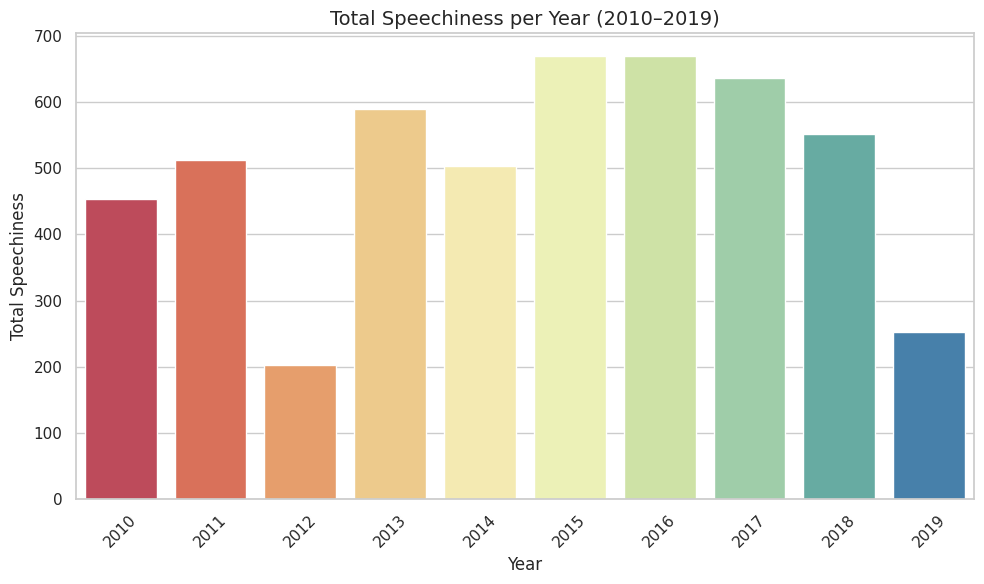

In [75]:
# Sum total speechiness across songs per year
speechiness_per_year = df.groupby('year')['spch'].sum().reset_index().sort_values(by='year')

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=speechiness_per_year,
            x='year', # x axis name
            y='spch', # y axis name
            hue='year', # Using hue to support palette, without it, it calls for warning
            palette='Spectral', # Using the color palette Spectral
            dodge=False, # Ensures that the bars stay aligned and stacked
            legend=False) # removing legend to remove future warning

# Set chart title and labels
plt.title("Total Speechiness per Year (2010–2019)", fontsize=14) # Title and fontsize
plt.xlabel("Year") # X axis label
plt.ylabel("Total Speechiness") # Y axis label
plt.xticks(rotation=45) # Rotate x-axis labels
plt.tight_layout() # Adjust spacing to prevent label overlap
plt.show() #Print